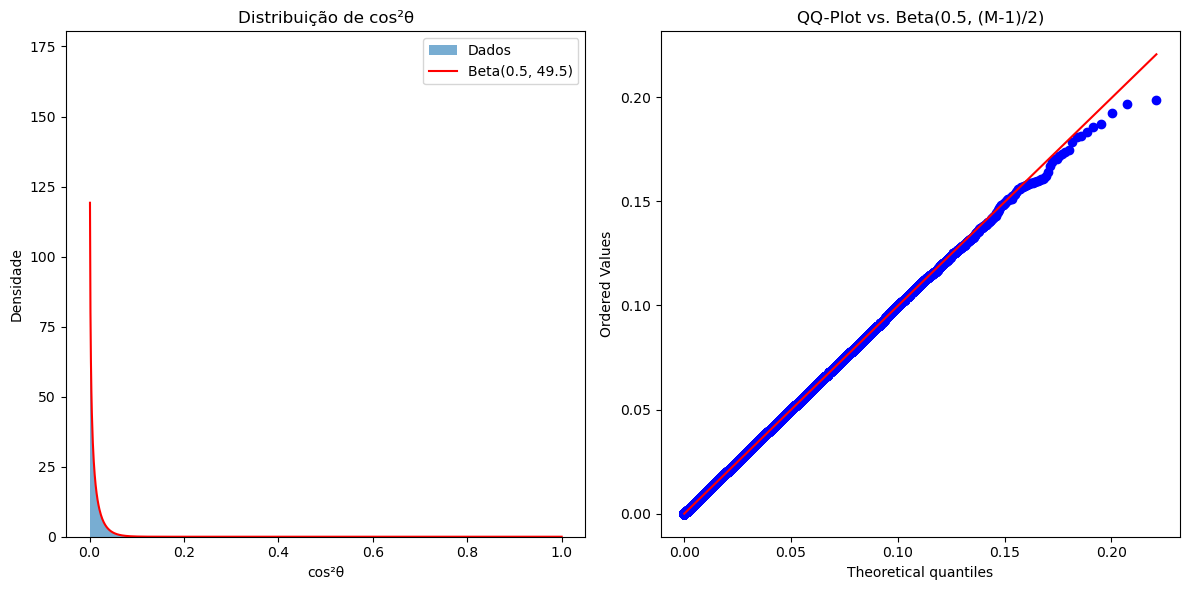

Parâmetros da Beta: α = 0.5, β = 49.5


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Configurações
M = 100     # Dimensão das colunas (linhas da matriz)
N = 10000   # Número de colunas (grande para boa estatística)
np.random.seed(42)

# 1. Gera matriz gaussiana A ~ N(0,1)
A = np.random.normal(0, 1, (M, N))

# 2. Normaliza as colunas (cada coluna vira vetor unitário)
A_normalized = A / np.linalg.norm(A, axis=0)

# 3. Calcula produtos internos entre colunas normalizadas (cos θ)
produtos_internos = []
for i in range(N):
    for j in range(i+1, min(i+100, N)):  # Pares não repetidos
        cos_theta = np.dot(A_normalized[:, i], A_normalized[:, j])
        produtos_internos.append(cos_theta)

# 4. Calcula cos²θ (que segue uma Beta(1/2, (M-1)/2))
cos_squared = np.array(produtos_internos)**2

# 5. Plotagem
plt.figure(figsize=(12, 6))

# Histograma de cos²θ vs. Beta teórica
plt.subplot(1, 2, 1)
x = np.linspace(0, 1, 1000)
beta_teorica = stats.beta.pdf(x, 0.5, (M-1)/2)
plt.hist(cos_squared, bins=100, density=True, alpha=0.6, label='Dados')
plt.plot(x, beta_teorica, 'r-', label=f'Beta(0.5, {(M-1)/2})')
plt.xlabel('cos²θ')
plt.ylabel('Densidade')
plt.legend()
plt.title('Distribuição de cos²θ')

# QQ-Plot para verificar o ajuste à Beta
plt.subplot(1, 2, 2)
stats.probplot(cos_squared, dist=stats.beta(0.5, (M-1)/2), plot=plt)
plt.title('QQ-Plot vs. Beta(0.5, (M-1)/2)')

plt.tight_layout()
plt.show()

# Mostra os parâmetros da Beta
alpha, beta = 0.5, (M-1)/2
print(f"Parâmetros da Beta: α = {alpha}, β = {beta}")